#### Breast Cancer Detection Model with Machine Learning

Modelo Classificador para detecção de Cancer de Mama.

1. Definição do Problema
    - qual o objetivo (quais perguntas queremos responder com este dataset?)
    - De onde vem o dataset: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
    - para mais detalhes consulte:.....
    - Informaçoes sonbre os atributos (listar atributos e o que cada um deles significa)
2. Carga de Dados
3. Análise de Dados
    - Estatísticas descritivas (dimensões do dataset, info, head, tail, dataset.dtypes, dataset.describe, distribuicao das classes) - colocar gráfico da distrribuição das classes
    - Histograma para cada atributo do dataset (histograma ou density plot e boxplot)
    - Matriz de correlação e scatterplot
4. Pré-processamento de dados (preparação e limpeza dos dados)
    - Tratamento de valores missing (colocar gráfico de valores missing)
    - Transformaçoes (normalizacao, padronizacao)
    - Separacao em cj de treino e teste
5. Desenvolvimento dos modelos de Classificação
    - Definição dos parâmetros de validacao cruzada
    - criação dos modelos
    - comparacao do modelos
    - Ajuste dos modelos (hiperparametros)
6. Finalizacao
    - Escolha do modelo
    - Aplicação do modelo em dados não vistos
7. Conclusão
8. Limitações

Referências:
https://thecleverprogrammer.com/2020/11/14/breast-cancer-detection-with-machine-learning/
https://colab.research.google.com/drive/1d0VtmAltEsJ0i41U0TlV1MgcV7fKAZRW#scrollTo=HDcdO4yx9db6
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset




### 1. Problem understanding
- In this project, a machine learning model was created to classify the prognosis of a breast cancer (malignant or benign) based on features computed from digitized images of breast tumors. They describe characteristics of the cell nuclei present in the images.
- Some asks could be answered in the present analysis:
    1. Which features are more influential in prognosis?
    2. Which machine learning model presents the highest accuracy in determining prognosis?
    3. What is the value of this accuracy?
- The data set used is **Breast Cancer Wisconsin (Diagnostic) Data Set** from Scikit-Learn, originally found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. 
- This dataset contains 569 instances and 30 attributes.
- **Attribute Information:**
    * radius (mean of distances from center to points on the perimeter)
    * texture (standard deviation of gray-scale values)
    * perimeter
    * area
    * smoothness (local variation in radius lengths)
    * compactness (perimeter^2 / area - 1.0)
    * concavity (severity of concave portions of the contour)
    * concave points (number of concave portions of the contour)
    * symmetry
    * fractal dimension (“coastline approximation” - 1)
    The mean, standard error, and “worst” or largest (mean of the three worst/largest values) of these features were computed for each image, resulting in 30 features.

### 2. Load dataset:

In [5]:
# Import modules:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

import seaborn as sns

In [6]:
# Dataset loading:
data_load = load_breast_cancer()

In [10]:
data_load.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [17]:
data_load.target_names

array(['malignant', 'benign'], dtype='<U9')

In [15]:
# Creating a data frame with load data:
df = pd.DataFrame(data_load.data, columns = data_load.feature_names)

In [28]:
# Adding diagnosis feature on data frame:
df['diagnosis'] = data_load.target

In [29]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 3. Data exploration:

In [21]:
df.shape

(569, 31)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [24]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

In [25]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


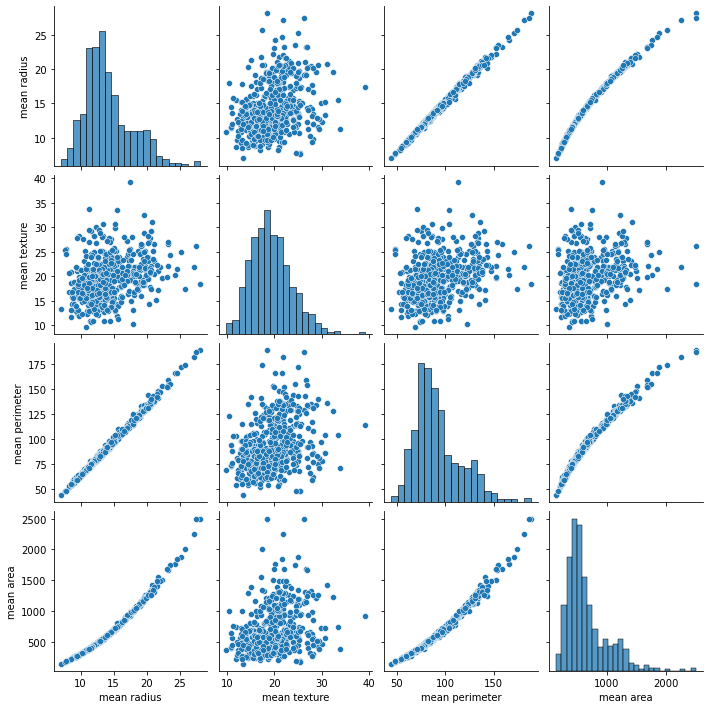

In [14]:
sns.pairplot(data[['mean radius','mean texture','mean perimeter','mean area']])
plt.show()

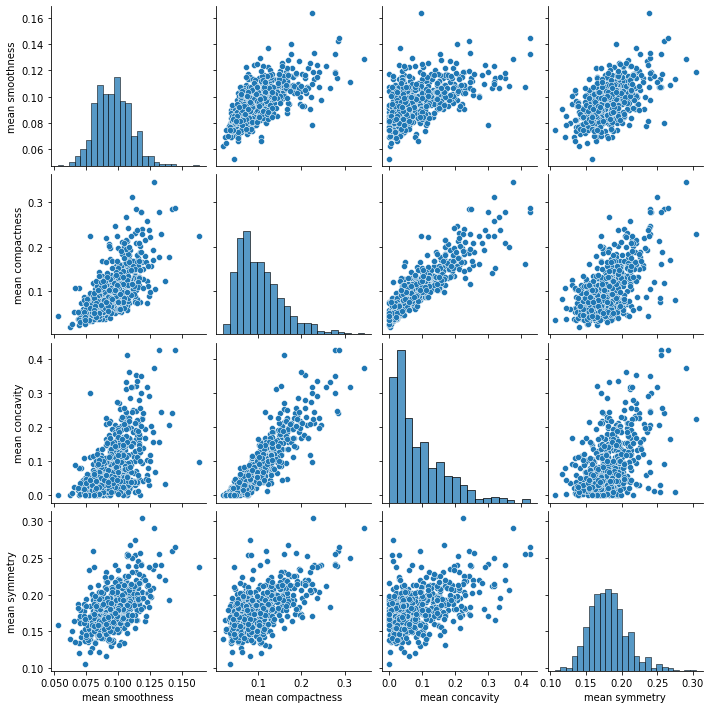

In [15]:
sns.pairplot(data[['mean smoothness','mean compactness','mean concavity','mean symmetry']])
plt.show()